In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_excel('D:/My_files/DataSet/voice.xlsx')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [7]:
features = df.drop('label', axis=1)

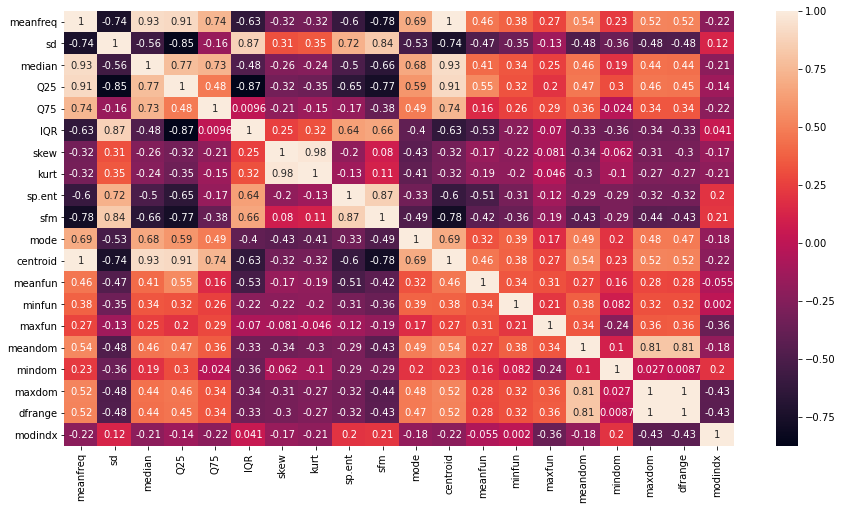

In [8]:
C = features.corr()
plt.figure(figsize=(15,8))
sns.heatmap(C, annot=True)
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()
features_scaled = pd.DataFrame(ss.fit_transform(features), columns=features.columns)

In [11]:
features_scaled.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


In [12]:
pca = PCA()
pca.fit(features_scaled)

PCA()

In [13]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 45.21639078,  57.08699983,  67.99693913,  75.6167023 ,
        80.91064001,  85.52560636,  88.73008854,  91.62848247,
        94.08020892,  95.95572644,  97.61163217,  98.50747469,
        99.19776619,  99.66681257,  99.89572543,  99.96027781,
       100.        , 100.        , 100.        , 100.        ])

In [14]:
pc = 0
for ev in np.cumsum(pca.explained_variance_ratio_):
    if ev <= 0.992:
        pc = pc + 1
    else:
        print(pc)
        break

13


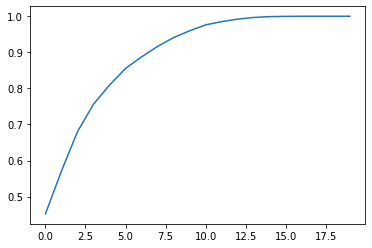

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.axhline(0.99, c='r')
# plt.axvline(13, c='b')
plt.show()

In [16]:
pca_ = PCA(n_components=13)
pca_transform = pd.DataFrame(pca_.fit_transform(features_scaled), columns=['z1','z2','z3','z4','z5','z6',
                                                               'z7','z8','z9','z10','z11','z12','z13'])

In [17]:
pca_transform.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13
0,8.208516,2.164488,1.959784,5.452417,0.930851,-1.202176,-1.239370,-1.555728,-1.815147,-1.125035,0.312786,-0.334114,0.252076
1,8.671892,3.854627,4.107208,5.079575,0.411480,-0.120161,-0.880189,-0.899986,-0.390545,-1.805025,-0.656863,-0.143639,-0.011879
2,9.111169,4.519140,7.528252,3.464543,-0.049165,1.219385,-0.268173,-0.187280,-0.457554,-2.178655,-0.419932,0.125988,-0.860194
3,4.109261,-0.562341,-1.253138,-0.667666,0.003349,-0.965539,-0.348339,0.193231,-0.575210,-0.103054,-0.632156,0.120550,0.266021
4,4.057255,-2.272709,-0.576060,0.962292,-0.183624,-0.493363,0.411477,0.250032,-0.109875,-0.208719,-0.305176,0.301849,-0.322740


In [18]:
pca_transform.shape

(3168, 13)

In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_transform)
    wcss.append(kmeans.inertia_)

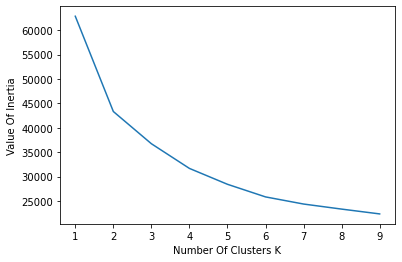

In [21]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number Of Clusters K')
plt.ylabel('Value Of Inertia')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=2)
m = kmeans.fit(pca_transform)
clusters = m.predict(pca_transform)

In [23]:
pca_transform['label'] = clusters

In [24]:
pca_transform.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,label
0,8.208516,2.164488,1.959784,5.452417,0.930851,-1.202176,-1.239370,-1.555728,-1.815147,-1.125035,0.312786,-0.334114,0.252076,0
1,8.671892,3.854627,4.107208,5.079575,0.411480,-0.120161,-0.880189,-0.899986,-0.390545,-1.805025,-0.656863,-0.143639,-0.011879,0
2,9.111169,4.519140,7.528252,3.464543,-0.049165,1.219385,-0.268173,-0.187280,-0.457554,-2.178655,-0.419932,0.125988,-0.860194,0
3,4.109261,-0.562341,-1.253138,-0.667666,0.003349,-0.965539,-0.348339,0.193231,-0.575210,-0.103054,-0.632156,0.120550,0.266021,0
4,4.057255,-2.272709,-0.576060,0.962292,-0.183624,-0.493363,0.411477,0.250032,-0.109875,-0.208719,-0.305176,0.301849,-0.322740,0


In [25]:
pca_transform = pca_transform.sample(frac=1, random_state=101).reset_index(drop=True)

In [26]:
pca_transform.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,label
0,-5.828236,-0.348798,0.851621,-0.433294,0.188776,0.130877,-0.129510,0.863517,0.760279,-0.213737,0.599677,-0.068570,-0.394837,1
1,-3.826025,1.214386,0.241197,-0.622238,1.301850,-0.548447,-0.410584,-0.000556,0.451271,-0.086385,0.096833,-0.087982,-0.138135,1
2,-4.616849,1.263071,0.472184,-2.366658,2.183936,0.166187,-0.142693,-0.142859,1.349447,0.130021,-0.119463,0.136431,-0.121894,1
3,3.045076,-1.432122,0.114616,1.109707,-0.242415,-0.981956,-0.035978,0.047735,-0.688440,-0.456746,-0.218493,0.176753,-0.280083,0
4,-0.922888,-1.880239,0.671608,-0.276280,-0.417633,0.157043,-0.429680,-0.548186,-0.370303,-0.056861,0.105121,0.094665,0.063086,1


In [27]:
pca_transform.label.value_counts(normalize=False)

1    1917
0    1251
Name: label, dtype: int64

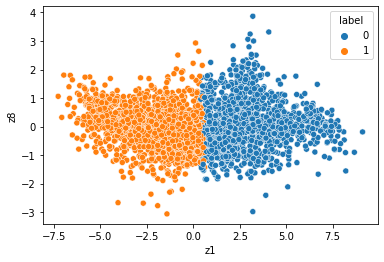

In [242]:
sns.scatterplot(x=pca_transform['z1'],y=pca_transform['z8'], data=pca_transform, hue=pca_transform['label'])
plt.show()

In [29]:
data = pca_transform.copy()

In [30]:
data.head(2)

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,label
0,-5.828236,-0.348798,0.851621,-0.433294,0.188776,0.130877,-0.129510,0.863517,0.760279,-0.213737,0.599677,-0.068570,-0.394837,1
1,-3.826025,1.214386,0.241197,-0.622238,1.301850,-0.548447,-0.410584,-0.000556,0.451271,-0.086385,0.096833,-0.087982,-0.138135,1


In [31]:
np.random.randn(3,1)

array([[ 1.0422027 ],
       [ 1.93799313],
       [-0.51145908]])

In [77]:
def sigmoid(z):
    z = np.array(z)
    return 1/(1 + (np.exp(-z)))

In [33]:
x = np.array([-5, 0, 5.0])
output = sigmoid(x)
print(output)

[6.73794700e-03 1.00000000e+00 1.48413159e+02]


In [134]:
def initialize_Weights_n_Bias(dim):
    w = np.zeros((dim,1))
    b = 0.0
    return w,b

In [35]:
initialize_Weights_n_Bias(3)

(array([[ 0.64164601],
        [-0.15554991],
        [ 0.5917642 ]]),
 0.0)

In [64]:
def propagation(w, b, X, Y):
    m = X.shape[1]
    
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    J = -(1/m)*np.sum(Y*(np.log(A + 1e-8)) + (1-Y)*(np.log(1-A + 1e-8)))
    
    dZ = A - Y
    dw = (1/m)*(np.dot(X, dZ.T))
    db = (1/m)*np.sum(dZ)
    
    cost = np.squeeze(np.array(J))
    grads = {'dw':dw, 'db':db}
    
    return cost, grads
    

In [50]:
def optimize(w, b, X, Y, num_iterations, lr, print_cost):
    
    #w = copy.deepcopy(w)
    #b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        cost, grads = propagation(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - (lr*dw)
        b = b - (lr*db)
        
        if i%100 == 0:
            costs.append(cost)
            
            if print_cost:
                print("Cost after iteration %i: %f" %(i, cost))
                
    params = {'w': w, 'b':b}
    grads = {'dw':dw, 'db':db}
    
    return params, grads, costs

In [38]:
def predict(w, b, X, Y):
    m = X.shape[1]
    
    Y_prediction = np.zeros((1, m))
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(X.shape[1]):
        
        if A[0,i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
            
    return Y_prediction        

In [52]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, lr=0.001, print_cost=False):
    

    w,b = initialize_Weights_n_Bias(X_train.shape[0])

    params,grads,cost = optimize(w, b, X_train, Y_train, num_iterations, lr, print_cost=False)

    w = params['w']
    b = params['b']

    

    Y_prediction_test = predict(w,b,X_test,Y_test)
    Y_prediction_train = predict(w,b,X_train,Y_train)


    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": cost,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : lr,
         "num_iterations": num_iterations}
    
    return d

In [40]:
Y = data['label']
X = data.drop('label', axis=1)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                   X, Y, test_size=0.3, random_state=1)

In [43]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2217, 13), (951, 13), (2217,), (951,))

In [44]:
X_trains = X_train.values.reshape(2217,13).T
X_tests = X_test.values.reshape(951,13).T
Y_trains = Y_train.values.reshape(2217,1).T
Y_tests = Y_test.values.reshape(951,1).T
#X_trains.shape

In [45]:
X_trains.shape, X_tests.shape, Y_trains.shape, Y_tests.shape

((13, 2217), (13, 951), (1, 2217), (1, 951))

In [234]:
logistic_regression_model = model(X_trains, Y_trains, X_tests, Y_tests,
                                  num_iterations=4000, lr=0.95, print_cost=True) # lr from 0.75 to 8 and above is doing great job 

train accuracy: 99.81957600360847 %
test accuracy: 99.89484752891693 %


In [238]:
logistic_regression_model

{'costs': [array(0.69314716),
  array(0.04876015),
  array(0.0390113),
  array(0.03426162),
  array(0.03124797),
  array(0.02909183),
  array(0.0274378),
  array(0.02610958),
  array(0.02500793),
  array(0.02407194),
  array(0.02326176),
  array(0.02255004),
  array(0.02191723),
  array(0.02134894),
  array(0.02083427),
  array(0.0203648),
  array(0.01993391),
  array(0.01953627),
  array(0.01916757),
  array(0.01882426),
  array(0.01850339),
  array(0.01820248),
  array(0.01791942),
  array(0.01765241),
  array(0.01739992),
  array(0.01716059),
  array(0.01693326),
  array(0.0167169),
  array(0.01651061),
  array(0.0163136),
  array(0.01612514),
  array(0.01594461),
  array(0.01577143),
  array(0.01560509),
  array(0.01544513),
  array(0.01529113),
  array(0.01514272),
  array(0.01499953),
  array(0.01486126),
  array(0.01472762)],
 'Y_prediction_test': array([[0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
         1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 

In [126]:
#Y_trains[0]

In [236]:
print("Classification Report For Train:\n", classification_report(Y_trains[0], logistic_regression_model['Y_prediction_train'][0]))
print()
print("Classification Report For Test:\n", classification_report(Y_tests[0], logistic_regression_model['Y_prediction_test'][0]))

Classification Report For Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       879
           1       1.00      1.00      1.00      1338

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217


Classification Report For Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00       579

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951



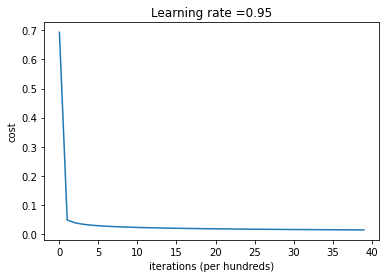

In [237]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.008
train accuracy: 99.00766801984663 %
test accuracy: 98.84332281808622 %

-------------------------------------------------------

Training a model with learning rate: 0.01
train accuracy: 98.96256202074876 %
test accuracy: 99.05362776025237 %

-------------------------------------------------------

Training a model with learning rate: 0.1
train accuracy: 99.45872801082544 %
test accuracy: 99.6845425867508 %

-------------------------------------------------------

Training a model with learning rate: 0.5
train accuracy: 99.72936400541272 %
test accuracy: 99.89484752891693 %

-------------------------------------------------------

Training a model with learning rate: 0.6
train accuracy: 99.72936400541272 %
test accuracy: 99.89484752891693 %

-------------------------------------------------------

Training a model with learning rate: 0.65
train accuracy: 99.72936400541272 %
test accuracy: 99.89484752891693 %

----------------------------------

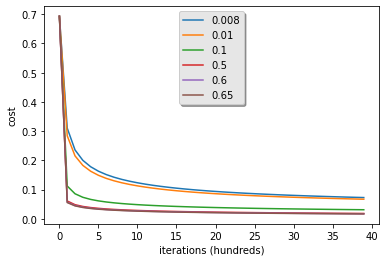

In [183]:
learning_rates = [0.008, 0.01, 0.1, 0.5, 0.6, 0.65]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(X_trains, Y_trains, X_tests, Y_tests,
                            num_iterations=4000, lr=lr, print_cost=True)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [107]:
LR = LogisticRegression(solver='liblinear', max_iter=3000)
LR.fit(X_train, Y_train)

LogisticRegression(max_iter=3000, solver='liblinear')

In [108]:
print('Classification Report For Train:\n', classification_report(Y_train, LR.predict(X_train)))
print()
print('Classification Report For Test:\n', classification_report(Y_test, LR.predict(X_test)))

Classification Report For Train:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       879
           1       1.00      1.00      1.00      1338

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217


Classification Report For Test:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       372
           1       1.00      1.00      1.00       579

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951

